NAME: Shrujan Kharwadey  

Practical : 5

Roll No: 54

Section: B    

**I am Shrujan Kharwadey**, This practical will be related to Osteoporosis bone density testing (am having the same disease so have a personal interest to explore this.)

In [1]:
# Imported the Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

array([[125, 124, 121, ...,   0,   0,   0],
       [128, 126, 123, ...,   0,   0,   0],
       [131, 129, 126, ...,   0,   0,   0],
       ...,
       [ 59,  59,  59, ...,   0,   0,   0],
       [ 58,  58,  58, ...,   0,   0,   0],
       [ 58,  58,  58, ...,   0,   0,   0]], dtype=uint8)
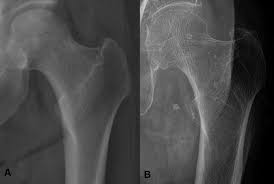

In [6]:
# Image Load kardo! then perform.
img_path = "/content/osteo_bone.jpeg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

img

array([[  0,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
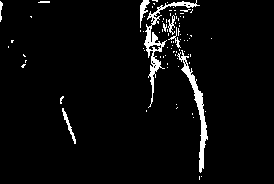

In [10]:
_, Thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
contor, _ = cv2.findContours(Thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(max(contor, key=cv2.contourArea))
cropped = img[y:y+h, x:x+w]

Thresh

# yaha observation me ye ata hai ki,
# osteoporosis bones are more porous as we can observe in the second image
# because yaha grayscale conversion pe white impression aya hai

In [11]:
contor

(array([[[201, 176]]], dtype=int32),
 array([[[199, 176]],
 
        [[199, 179]]], dtype=int32),
 array([[[193, 117]]], dtype=int32),
 array([[[192, 113]],
 
        [[192, 114]]], dtype=int32),
 array([[[205, 111]]], dtype=int32),
 array([[[146, 110]],
 
        [[146, 111]]], dtype=int32),
 array([[[ 62, 108]],
 
        [[ 62, 111]],
 
        [[ 63, 112]],
 
        [[ 63, 115]],
 
        [[ 64, 116]],
 
        [[ 64, 119]],
 
        [[ 65, 119]],
 
        [[ 66, 120]],
 
        [[ 66, 122]],
 
        [[ 67, 123]],
 
        [[ 67, 124]],
 
        [[ 68, 125]],
 
        [[ 68, 129]],
 
        [[ 70, 131]],
 
        [[ 70, 133]],
 
        [[ 72, 135]],
 
        [[ 72, 138]],
 
        [[ 73, 139]],
 
        [[ 73, 140]],
 
        [[ 74, 141]],
 
        [[ 74, 143]],
 
        [[ 75, 143]],
 
        [[ 75, 139]],
 
        [[ 74, 138]],
 
        [[ 74, 136]],
 
        [[ 73, 135]],
 
        [[ 73, 133]],
 
        [[ 71, 131]],
 
        [[ 71, 129]],
 
        [[

In [31]:
h, w = cropped.shape
center = (w//2, h//2)
M_rot = cv2.getRotationMatrix2D(center, 180, 1)
rotated = cv2.warpAffine(cropped, M_rot, (w, h))
M_shear = np.float32([[1, 0.5, 0], [0, 1.2, 0]])
sheared = cv2.warpAffine(rotated, M_shear, (w, h))

M_rot
M_shear

array([[1. , 0.5, 0. ],
       [0. , 1.2, 0. ]], dtype=float32)

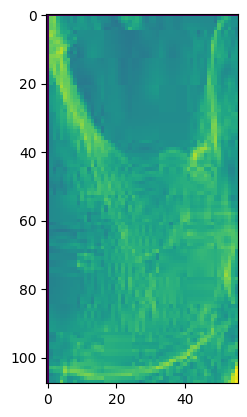

In [19]:
plt.imshow(rotated)

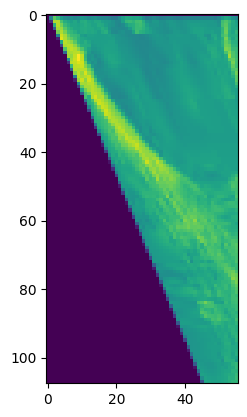

In [32]:
plt.imshow(sheared)

In [42]:
pts1 = np.float32([[0,0], [w-1, 0], [w-1, h-1], [0, h-1]])
pts2 = np.float32([[0,0], [w-1, 100], [w-1, h-1], [0, h-1]])


# Perspective transform matrix
M_pers = cv2.getPerspectiveTransform(pts1, pts2)
pers_transformed = cv2.warpPerspective(sheared, M_pers, (w, h))

colored = cv2.applyColorMap(cropped, cv2.COLORMAP_JET)



<ipython-input-48-66d4e845cdec>:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 3 ,6), plt.hist(pers_transformed.ravel(), 256, [0, 256]), plt.title('Histogram')


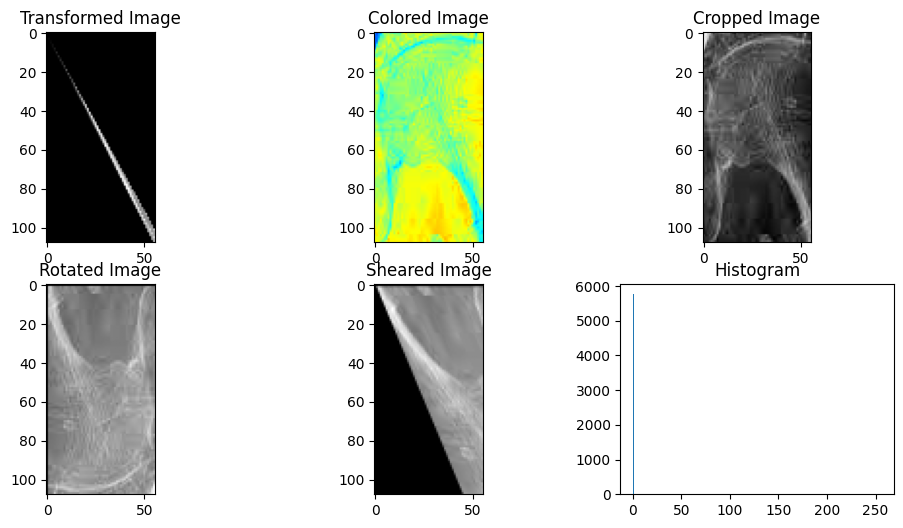

In [48]:
#Display kardo histogram and Images

# yaha dekh sakte hai in the colored image ,
plt.figure(figsize=(12, 6))
plt.subplot(2, 3 ,1), plt.imshow(pers_transformed, cmap='gray'), plt.title('Transformed Image')
plt.subplot(2, 3 ,2), plt.imshow(colored, cmap='gray'), plt.title('Colored Image')
plt.subplot(2, 3 ,3), plt.imshow(cropped, cmap='gray'), plt.title('Cropped Image')
plt.subplot(2, 3 ,4), plt.imshow(rotated, cmap='gray'), plt.title('Rotated Image')
plt.subplot(2, 3 ,5), plt.imshow(sheared, cmap='gray'), plt.title('Sheared Image')
plt.subplot(2, 3 ,6), plt.hist(pers_transformed.ravel(), 256, [0, 256]), plt.title('Histogram')

plt.show()